In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading data and combining all sheets into one data frame, also filling missing values with 0 
all_sheets = pd.read_excel("Copy of Folds5x2_pp.xlsx", sheet_name=None)
sheet_names = list(all_sheets.keys())
combined_sheets = []
for sheet in all_sheets.items():
    combined_sheets.append(sheet[1])

combined_data = pd.concat(combined_sheets, ignore_index=True)

In [4]:
# basic info on data

print("Data Shape:", combined_data.shape)
print("\nFirst few rows:\n", combined_data.head())
print("\n")
print("\nBasic info:\n", combined_data.info())
print("\nDescriptive statistics:\n", combined_data.describe())

Data Shape: (47840, 5)

First few rows:
       AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB

Basic info:
 None

Descriptive statistics:
                  AT             V            AP            RH            PE
count  47840.000000  47840.000000  47840.000000  47840.000000  47840.000000
mean      19.651231     54.305804   1013.259078     73.308978    454.365009
std        7.452162     12.707362    

In [5]:
# cleaning data by filling missing values with 0
combined_data.fillna(0, inplace=True)

In [6]:
def find_mean(data):
    mean = np.mean(data)
    return mean

In [7]:
def find_median(data):
    median = np.median(data)
    return median

In [8]:
def find_std_dev(data):
    std_dev = np.std(data)
    return std_dev

Statistics for each column:


Column: AT
Mean: 19.6512
Median: 20.3450
Standard Deviation: 7.4521


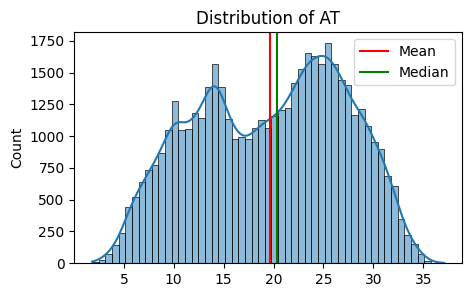


Column: V
Mean: 54.3058
Median: 52.0800
Standard Deviation: 12.7072


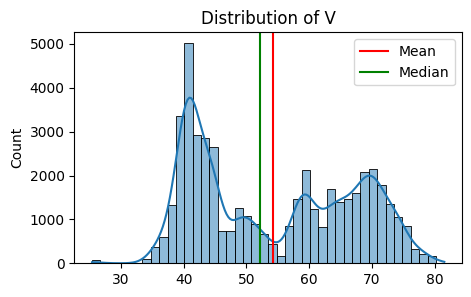


Column: AP
Mean: 1013.2591
Median: 1012.9400
Standard Deviation: 5.9385


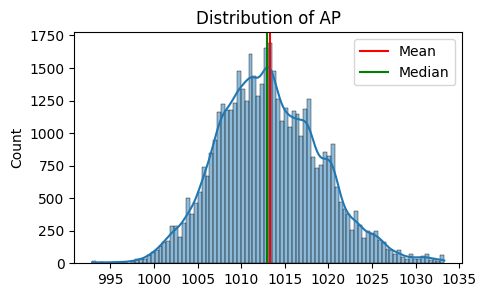


Column: RH
Mean: 73.3090
Median: 74.9750
Standard Deviation: 14.5995


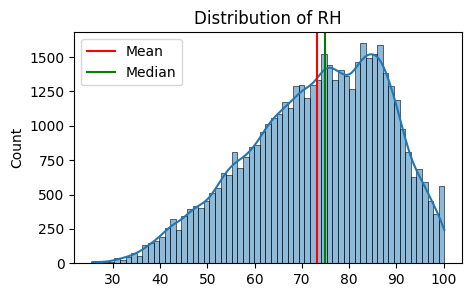


Column: PE
Mean: 454.3650
Median: 451.5500
Standard Deviation: 17.0661


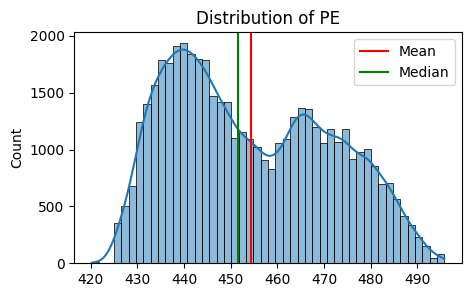

In [9]:
# calculating statistics for each column
print("Statistics for each column:\n")

for i, column in enumerate(combined_data.columns):
    data = combined_data.iloc[:, i].values
    
    print(f"\nColumn: {column}")
    print(f"Mean: {find_mean(data):.4f}")
    print(f"Median: {find_median(data):.4f}")
    print(f"Standard Deviation: {find_std_dev(data):.4f}")

    plt.figure(figsize=(5, 3))
    sns.histplot(data, kde=True)
    plt.axvline(find_mean(data), color='red', label='Mean')
    plt.axvline(find_median(data), color='green', label='Median')
    plt.legend()
    plt.title(f"Distribution of {column}")
    plt.show()
    

In [10]:
# calculating outliers using Z-scoring
print("\nOutliers for each column (Z-score > 3):\n")

for i, column in enumerate(combined_data.columns):
    data = combined_data.iloc[:, i].values
    
    mean = find_mean(data)
    std_dev = find_std_dev(data)
    
    z_scores = (data - mean) / std_dev
    outliers = data[np.abs(z_scores) > 3]
    
    print(f"\nColumn: {column}")
    print(f"Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outlier values: \n{outliers}")
    else:
        print("No outliers found")


Outliers for each column (Z-score > 3):


Column: AT
Number of outliers: 0
No outliers found

Column: V
Number of outliers: 0
No outliers found

Column: AP
Number of outliers: 255
Outlier values: 
[1033.25 1031.1  1033.04 1033.3  1032.67 1033.08  994.17  995.24 1031.55
 1031.5  1031.96 1032.98 1032.93 1031.33 1033.19 1031.96 1032.86 1032.77
 1033.09 1031.8  1032.08  993.31 1033.14 1032.88 1032.72 1031.45 1032.14
  995.02 1031.14  993.82 1032.83 1032.37 1032.16 1031.16  994.6   993.74
 1031.39 1031.2  1031.27 1031.97 1033.29 1031.58 1031.08  993.11 1031.75
 1031.21 1031.34  992.89 1031.71 1031.21 1031.32 1033.09 1031.34 1031.96
 1031.16 1031.21 1033.3  1031.27 1031.58 1032.72 1031.39 1031.97 1031.5
 1031.45  995.02 1031.08 1032.67 1031.32  993.82 1032.08 1031.33 1031.8
  993.74 1031.1  1033.19 1032.86  993.31  994.6  1033.04  995.24 1032.88
 1032.16  992.89 1033.08 1032.14 1032.98 1033.25 1032.83 1031.71 1032.77
  994.17 1031.55  993.11 1032.93 1033.29 1031.75 1031.21 1031.2  1033.14
 

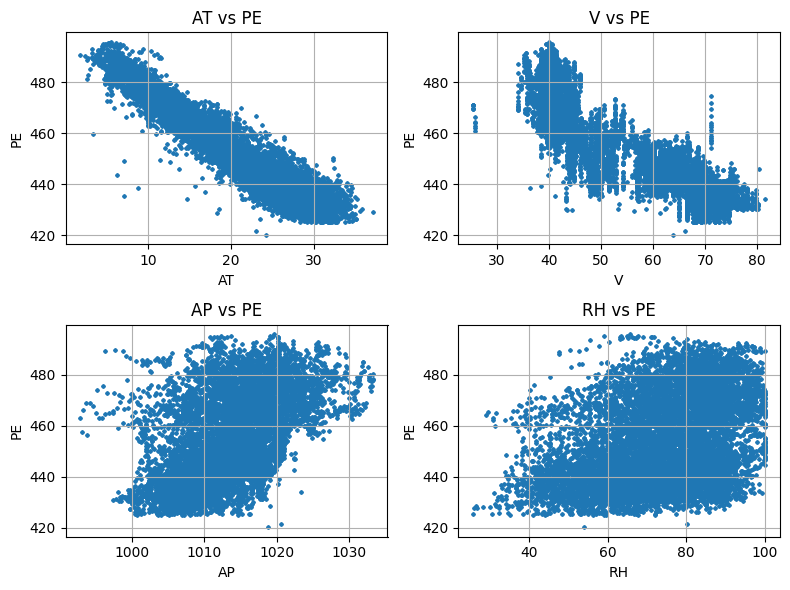

In [11]:
# creating scatter plots for each column

input_columns = [col for col in combined_data.columns if col != 'PE']
output_column = 'PE'
num_input_columns = len(input_columns)
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# flattenning axes array to 1D
axes = axes.flatten()

for i, column in enumerate(input_columns):
    x_data = combined_data[column].values
    y_data = combined_data[output_column].values
    
    axes[i].scatter(x_data, y_data, s=3)
    axes[i].set_title(f'{column} vs {output_column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel(f'{output_column}')
    axes[i].grid(True)


plt.tight_layout()
plt.show()